SED690

SIT@KMUTT

2025


Perspective transformation

For perspective transformation, we need a 3x3 transformation matrix.
- Straight lines will remain straight even after the transformation.
- To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image.
- Among these 4 points, 3 of them should not be collinear.
- Then the transformation matrix can be found by the function cv.getPerspectiveTransform.
- Then apply cv.warpPerspective with this 3x3 transformation matrix.

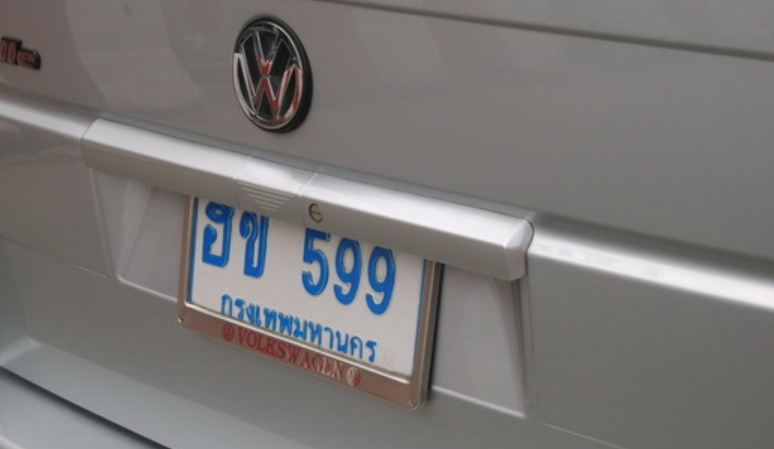

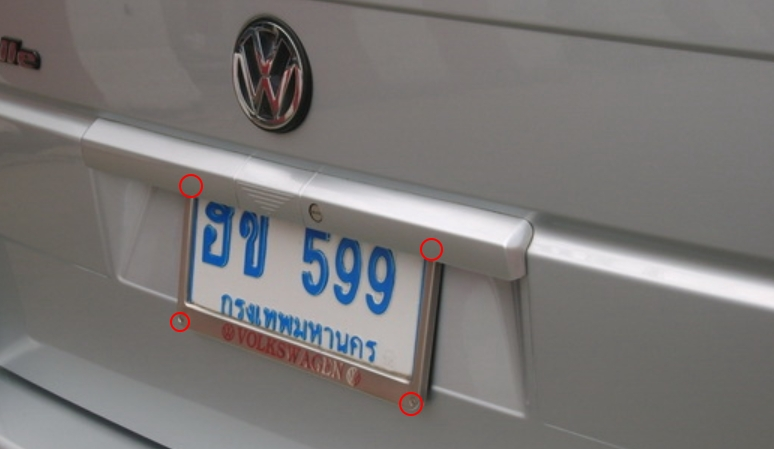

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

Input image (Tilted Thai License Plate)


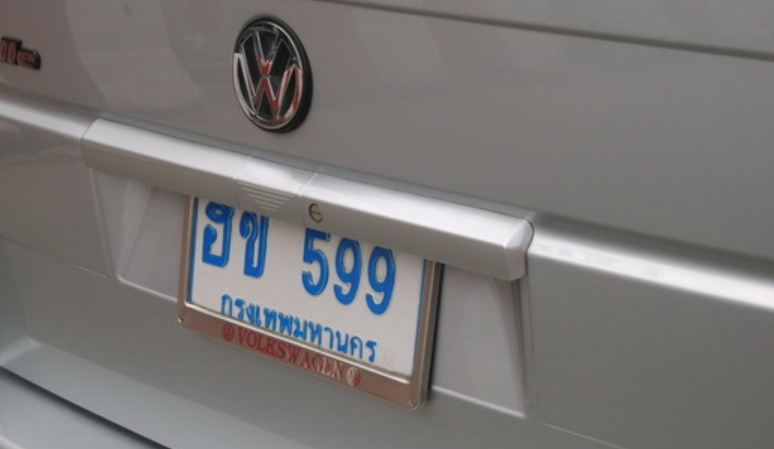

In [3]:
# Read in some images
# You can download the tilted Thai alphabet image given above.

image_bgr = io.imread("https://github.com/Shanks-TheRed/67-2_Homework/blob/main/SED690/pictures/license01.jpeg?raw=true")

# Need to convert to RGB for a proper display
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

print("Input image (Tilted Thai License Plate)")
cv2_imshow(image_rgb)

- Using the simple Paint program to find out about the needed four marked points (not shown here) of this image, we may use the follows.

- In a clockwise manner: top left, top right, bottom right, and bottom left: e.g., (133,137),(400,193),(263,350),and (45,320).
- Now, try to change and pick your own the marked points.

(449, 774, 3)
Transformed image


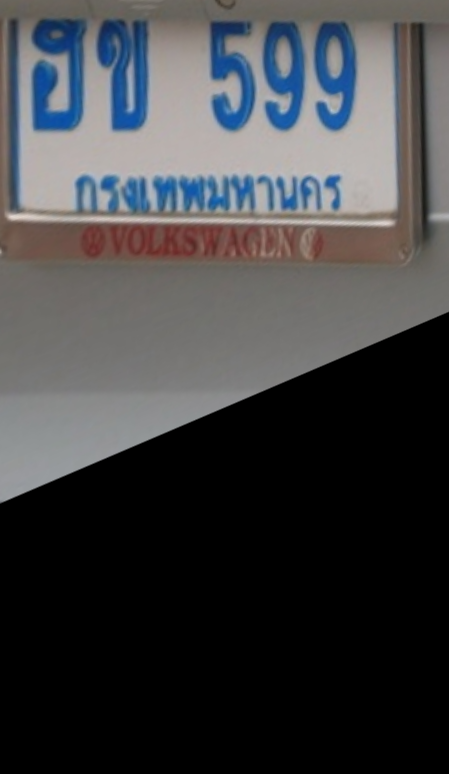

In [4]:
print(image_rgb.shape)
rows,cols,ch = image_rgb.shape

# In a clockwise manner: top left, top right, bottom right, and bottom left.
in_4pts = np.float32([[190,185],[430,245],[410,400],[180,320]]) # four marked input points

out_4pts = np.float32([[0,0],[400,0],[400,250],[0,250]]) # extended to the full size, using four marked ouput points

M = cv.getPerspectiveTransform(in_4pts,out_4pts)
dst = cv.warpPerspective(image_rgb,M,(rows,cols))

print("Transformed image")
cv2_imshow(dst)


Cropped image


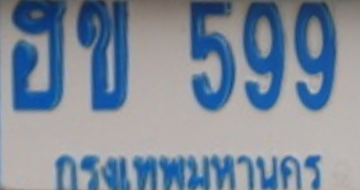

In [6]:
# crop the image
cropped_image = dst[20:210,20:380]

print("Cropped image")
cv2_imshow(cropped_image)


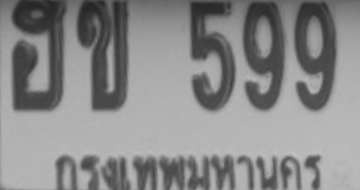

Grayscale
Grayscale  (190, 360)


In [10]:
#convert to grayscale
image_gray = cv.cvtColor(cropped_image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
print("Grayscale")
print("Grayscale ", image_gray.shape)

Low threshold value =  114.0


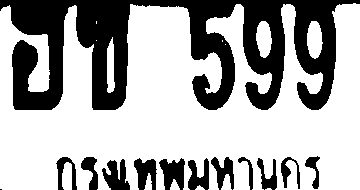

In [24]:
# Binary thresholding
tval = 114
(T, low_thresh) = cv.threshold(image_gray, tval, 255, cv.THRESH_BINARY)
print("Low threshold value = ",T)
cv2_imshow(low_thresh)

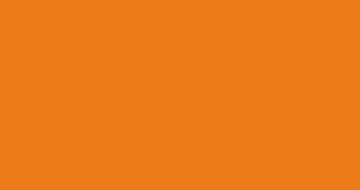

Orange = RGB(237,123,24)


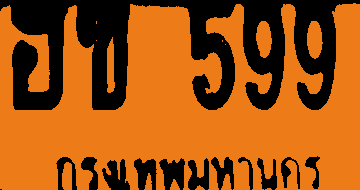

(190, 360, 3)
White to Orange


In [25]:
# Convert the binary image to a 3-channel BGR image
colored_image = cv.cvtColor(low_thresh, cv.COLOR_GRAY2BGR)

# normalized low_thresh image, in a [0,1] range
normalized_low_thresh = np.array(low_thresh, np.float32)/255.0

# white to orange color
w2o = np.ones(colored_image.shape) # use only 3 channels
w2o[:,:,0] *= 24 # B
w2o[:,:,1] *= 123 # G
w2o[:,:,2] *= 237 # R

cv2_imshow(w2o)
print("Orange = RGB(237,123,24)")

# Do a Hadamard product (element-wise product) by multiplying
# the corresponding cells of two matrices
w2o[:,:,0] *= normalized_low_thresh
w2o[:,:,1] *= normalized_low_thresh
w2o[:,:,2] *= normalized_low_thresh
image_w2o = np.array(w2o, np.uint8)

cv2_imshow(image_w2o)
print(image_w2o.shape)
print("White to Orange")

# Now try to fill in one color, say, orange, for a background.

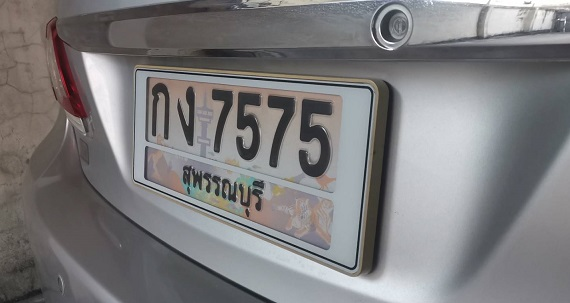

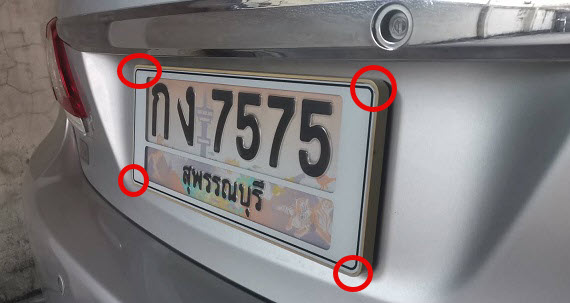

Here is my work ......
Input image (Tilted Thai License Plate)


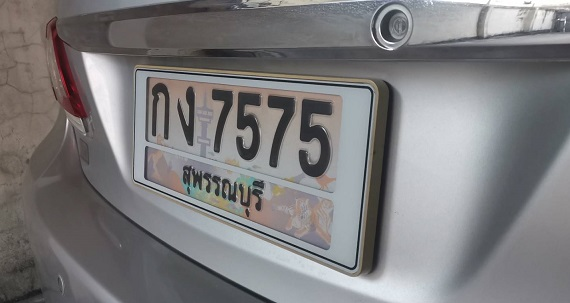

In [7]:
# Write your code here.
print("Here is my work ......")

image_bgr_2 = io.imread("https://github.com/Shanks-TheRed/67-2_Homework/blob/main/SED690/pictures/license02.jpeg?raw=true")

# Need to convert to RGB for a proper display
image_rgb_2 = cv.cvtColor(image_bgr_2, cv.COLOR_BGR2RGB)

print("Input image (Tilted Thai License Plate)")
cv2_imshow(image_rgb_2)

(303, 570, 3)
Transformed image


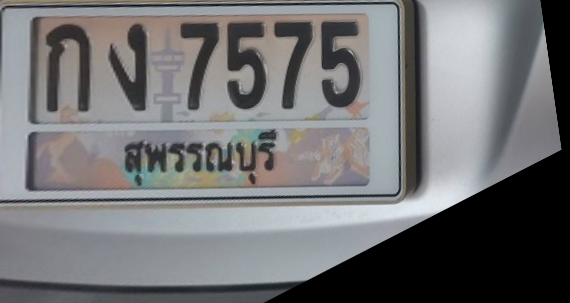

In [8]:
print(image_rgb_2.shape)
rows,cols,ch = image_rgb_2.shape

# In a clockwise manner: top left, top right, bottom right, and bottom left.
in_4pts_2 = np.float32([[135,65],[375,85],[355,275],[135,180]]) # four marked input points

out_4pts_2 = np.float32([[0,0],[400,0],[400,200],[0,200]]) # extended to the full size, using four marked ouput points

M_2 = cv.getPerspectiveTransform(in_4pts_2,out_4pts_2)
dst_2 = cv.warpPerspective(image_rgb_2,M_2,(cols,rows))

print("Transformed image")
cv2_imshow(dst_2)

Cropped image


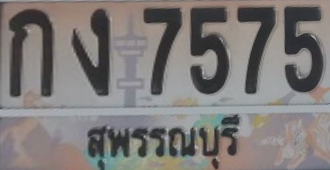

In [9]:
# crop the image
cropped_image_2 = dst_2[15:185,37:367]

print("Cropped image")
cv2_imshow(cropped_image_2)

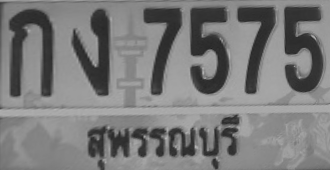

Grayscale
Grayscale  (170, 330)


In [16]:
#convert to grayscale
image_gray2 = cv.cvtColor(cropped_image_2, cv.COLOR_BGR2GRAY)
cv2_imshow(image_gray2)
print("Grayscale")
print("Grayscale ", image_gray2.shape)

Low threshold value =  100.0


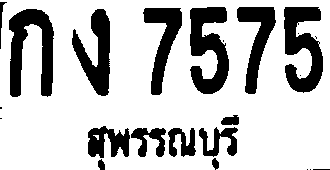

In [18]:
# Binary thresholding
tval2 = 100
(T2, low_thresh2) = cv.threshold(image_gray2, tval2, 255, cv.THRESH_BINARY)
print("Low threshold value = ",T2)
cv2_imshow(low_thresh2)

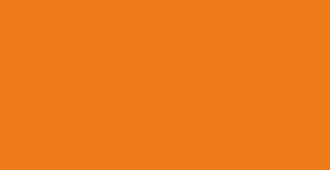

Orange = RGB(237,123,24)


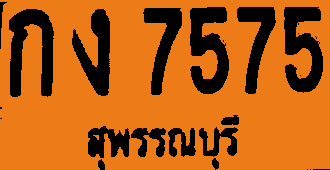

(170, 330, 3)
White to Magenta


In [21]:
# Convert the binary image to a 3-channel BGR image
colored_image2 = cv.cvtColor(low_thresh2, cv.COLOR_GRAY2BGR)

# normalized low_thresh image, in a [0,1] range
normalized_low_thresh2 = np.array(low_thresh2, np.float32)/255.0

# white to orange color
w2o2 = np.ones(colored_image2.shape) # use only 3 channels
w2o2[:,:,0] *= 24 # B
w2o2[:,:,1] *= 123 # G
w2o2[:,:,2] *= 237 # R

cv2_imshow(w2o2)
print("Orange = RGB(237,123,24)")

# Do a Hadamard product (element-wise product) by multiplying
# the corresponding cells of two matrices
w2o2[:,:,0] *= normalized_low_thresh2
w2o2[:,:,1] *= normalized_low_thresh2
w2o2[:,:,2] *= normalized_low_thresh2
image_w2o2 = np.array(w2o2, np.uint8)

cv2_imshow(image_w2o2)
print(image_w2o2.shape)
print("White to Orange")